C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Confusion Matrix:
[[19  0  0]
 [ 0  8  5]
 [ 0  3 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.73      0.62      0.67        13
           2       0.67      0.77      0.71        13

    accuracy                           0.82        45
   macro avg       0.80      0.79      0.79        45
weighted avg       0.82      0.82      0.82        45



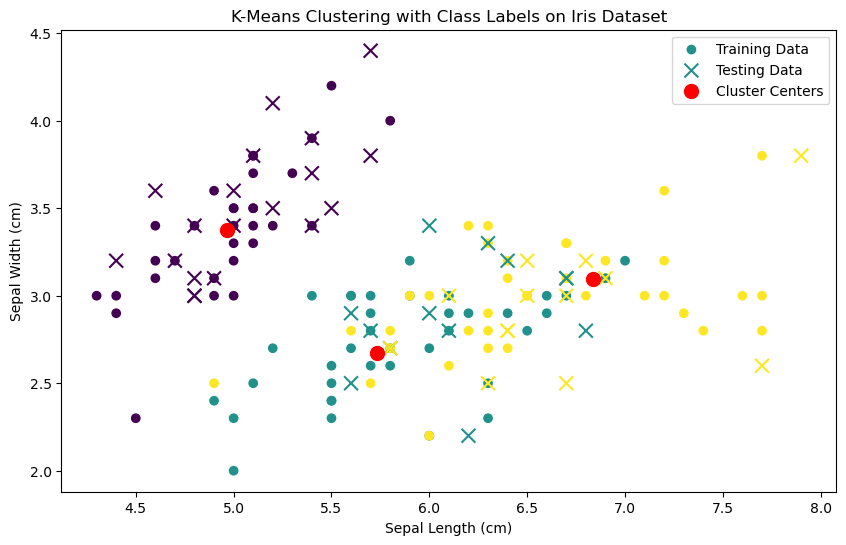

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix

#Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2] #Select only the features (sepal lengthy and sepal width)
y = iris.target

#Split database into traini9ng and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Initalize K-Means clustering with the number of clusters equal to the number of classes
n_clusters = len(np.unique(y))
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

#Fit K-Means clustering to the training data
kmeans.fit(X_train)

#Assign cluster labels to data points in test set
cluster_labels = kmeans.predict(X_test)

#Assign class labels to clusters based on thge most frequent class label in each cluster
cluster_class_labels = []
for i in range(n_clusters):
    cluster_indices = np.where(cluster_labels ==i)[0]
    cluster_class_labels.append(np.bincount(y_test[cluster_indices]).argmax())

#Assign cluster class labels to data points in the test set
y_pred = np.array([cluster_class_labels[cluster_labels[i]] for i in range(len(X_test))])

#Evaluate the classifier's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Visualize the dataset and cluster cemters
plt.figure(figsize=(10, 6))

#Plot the training data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Training Data')
      
#Plot testing data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='x', s=100, label='Testing Data')

#plt cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='o', s=100, label='Cluster Centers')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means Clustering with Class Labels on Iris Dataset')
plt.legend()
plt.show()
      
      
      

    
